In [9]:
import numpy as np
import pandas as pd
from plotnine import *
import statistics 

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

import plotly.graph_objects as go
import plotly.express as px 

# Regressão Linear

## Regressão Linear Univariada

In [10]:
#DataSet
dataset = pd.read_csv('leiR tweets.csv')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Username   2281 non-null   object 
 1   Handle     2286 non-null   object 
 2   Timestamp  2288 non-null   object 
 3   Comments   2288 non-null   object 
 4   Likes      456 non-null    float64
 5   Retweets   436 non-null    float64
 6   Text       1070 non-null   float64
dtypes: float64(3), object(4)
memory usage: 125.2+ KB


In [16]:
dataset["Likes"] = dataset["Likes"].fillna(0)
dataset["Retweets"] = dataset["Retweets"].fillna(0)

In [17]:
dataset["Likes"] = dataset["Likes"].astype(int)
dataset["Retweets"] = dataset["Retweets"].astype(int)

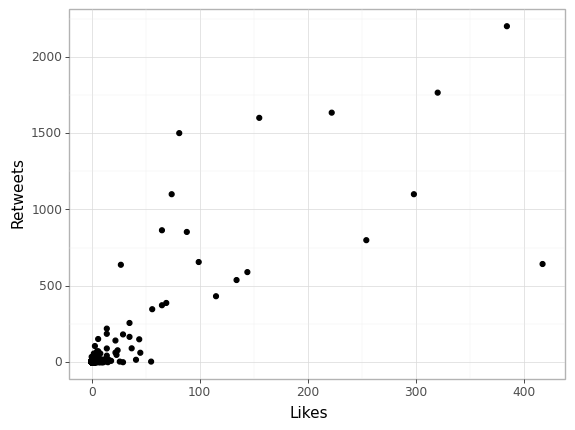

<ggplot: (150819291494)>

In [18]:
(ggplot(dataset,aes('Likes','Retweets'))
 + geom_point()
 + theme_light()
)

In [19]:
# Faremos uma cópia desse DF visto que ele será permutado
df_shuffle = dataset.copy()
df_shuffle 

,Username,Handle,Timestamp,Comments,Likes,Retweets,Text
0,CAPITÃO CAVERNA,@MarcosPimt,2021-12-06T18:37:59.000Z,CAPITÃO CAVERNAEm resposta a \n@lfcarr\n e \n@...,2,0,NaN
1,carlos pierre,@carlospgoliv,2021-12-06T18:25:19.000Z,carlos pierreEm resposta a \n@judepaulla1,0,0,NaN
2,#BrasilRepublicaPresidencialista,@Keila31177845,2021-12-06T18:00:28.000Z,#BrasilRepublicaPresidencialistaEm resposta a ...,0,0,NaN
3,Projeto Circular,@circularbelem,2021-12-06T17:58:12.000Z,Projeto CircularO Centro Histórico de Belém na...,1,0,8.0
4,Cnc76 Macho Alpha!!!,@Cnc712,2021-12-06T17:48:58.000Z,Cnc76 Macho Alpha!!!Em resposta a \n@zeliaduncan,0,0,NaN
...,...,...,...,...,...,...,...
2283,vandecarlos lopes,@carloslopes1956,2021-11-13T11:09:32.000Z,vandecarlos lopesA corrupção da lei rouanet e ...,0,0,NaN
2284,Otavio Bedinelli,@OtavioBedinelli,2021-11-13T10:39:34.000Z,Otavio BedinelliEm resposta a \n@taoquei1,0,0,NaN
2285,Kinkas Castro,@KinkasCastro,2021-11-13T10:29:39.000Z,Kinkas CastroEm resposta a \n@katiaduarte\n @b...,1,1,3.0
2286,"Conservador , Cristão",@BiraFratucello2,2021-11-13T10:14:14.000Z,"Conservador , CristãoTudo que beneficiava a va...",0,1,1.0


In [20]:
df_shuffle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Username   2281 non-null   object 
 1   Handle     2286 non-null   object 
 2   Timestamp  2288 non-null   object 
 3   Comments   2288 non-null   object 
 4   Likes      2288 non-null   int32  
 5   Retweets   2288 non-null   int32  
 6   Text       1070 non-null   float64
dtypes: float64(1), int32(2), object(4)
memory usage: 107.4+ KB


### Gradiente Descendente Covencional

In [21]:
w0 = 10 # termo independente
w1 = 20 # coeficiente angular
alfa = 0.001 # Taxa de aprendizado
EQM = list() # Erro Quadrado Médio por época

# GRADIENTE DESCENDENTE
for epoca in range(500):
    acc = 0
    erro = 0
    sumw0 = 0
    sumw1 = 0
    for i in range(len(dataset)):
        x_i = dataset.iloc[i,4]
        y_i = dataset.iloc[i,5]
        erro = (y_i - w1*x_i - w0)
        sumw0 += (y_i - w1*x_i - w0)
        sumw1 += (y_i - w1*x_i - w0)*df_shuffle.iloc[i,4]
        acc = acc + erro*erro
       
    w0 = w0 + (alfa*sumw0)/len(df_shuffle)
    w1 = w1 + (alfa*sumw1)/len(df_shuffle)
       
    EQM.append(acc/len(df_shuffle))


### Predição

In [22]:
print("Os pesos encontrados foram", w0, "e", w1)

Os pesos encontrados foram 6.254353075970502 e 4.591762913880748


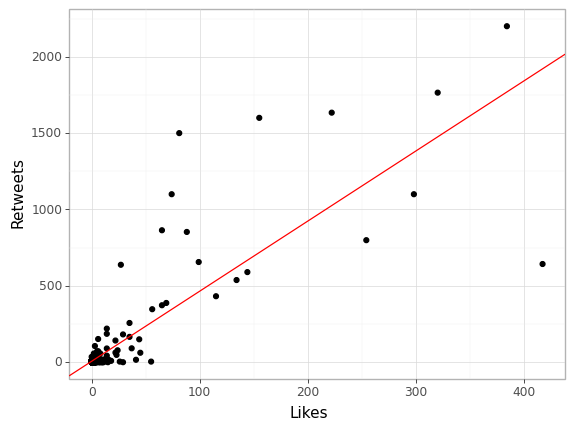

<ggplot: (150819348898)>

In [23]:
(ggplot(dataset,aes('Likes','Retweets'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=w0 , slope=w1, color='red')
)

In [24]:
def predict_(w0,w1,x):
    y = w1*x + w0
    return y

In [25]:
predict_(w0,w1,1.25)

11.994056718321438

### Curva de aprendizado

In [26]:
# Convertendo lista em DataFrame para plotar no PlotNine
EQM_df = pd.DataFrame(EQM)
EQM_df

,0
0,83071.885490
1,38105.561009
2,18340.079011
3,9651.873134
4,5832.792129
...,...
495,2784.056972
496,2783.992535
497,2783.928224
498,2783.864041


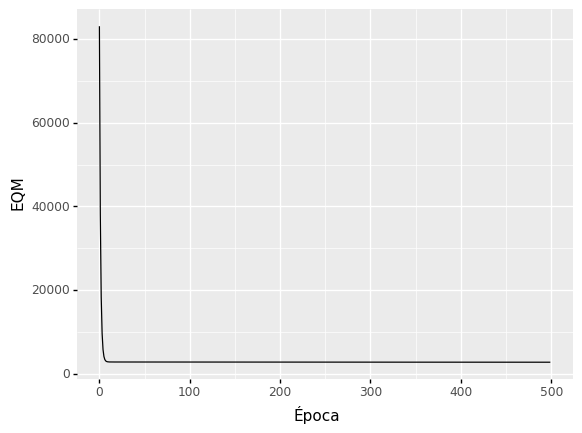

<ggplot: (150819303118)>

In [27]:
(ggplot(EQM_df, aes(EQM_df.index, EQM_df[0]))
+ geom_line()
+ xlab('Época')
+ ylab('EQM')
)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['Altura']]
y = df['Comprimento']

In [ ]:
modelskl = LinearRegression()

In [ ]:
modelskl.fit(X,y)

In [ ]:
modelskl.coef_

In [ ]:
modelskl.intercept_

In [ ]:
(ggplot(df,aes('Altura','Comprimento'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=modelskl.intercept_ , slope=modelskl.coef_[0], color='red')
)

In [ ]:
modelskl.predict([[1.25]])